In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time

random.seed(69_420)

In [2]:
df = pd.read_csv('../dataset/Financial_Data.csv')

In [3]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


### Data Preprocessing

In [4]:
### Feature Dropping ###

# according to EDA/histograms:
df = df.drop(columns = ['months_employed']) # drop, as most values are 0

# combine month and year columns
df['personal_account_months'] = (df.personal_account_m + (df.personal_account_y * 12))

# drop unnecessary
df = df.drop(columns = ['personal_account_m', 'personal_account_y'])

In [5]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,98


In [11]:
### One Hot Encoding ###

df = pd.get_dummies(df)
df.columns

Index(['age', 'home_owner', 'income', 'years_employed', 'current_address_year',
       'has_debt', 'amount_requested', 'risk_score', 'risk_score_2',
       'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month',
       'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_weekly'],
      dtype='object')

In [12]:
# put of "dammied", arbitrary remove one to prevent a leniar indepedency  
df = df.drop(columns = ['pay_schedule_semi-monthly'])

KeyError: "['pay_schedule_semi-monthly'] not found in axis"

In [ ]:
### Remove columns that are not going to be in the train set

response = df["e_signed"]   # for later use
users = df['entry_id']      # for later use
df = df.drop(columns = ["e_signed", "entry_id"])

In [ ]:
### Splitting into Train and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,
                                                    response,
                                                    test_size = 0.2)

In [ ]:
### Feature Scaling ###

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

# create new train/test vars for scaling
sc_X_train = pd.DataFrame(sc_X.fit_transform(X_train))
sc_X_test = pd.DataFrame(sc_X.transform(X_test))

In [13]:
sc_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.423895,-0.861748,1.923469,1.108199,-0.576770,0.505535,3.386061,-1.067021,-1.156584,0.366137,-0.119785,-1.428433,0.049607,0.054934,-0.121996,-0.150843,0.820135,-0.29974,-0.511514
1,-1.180256,-0.861748,-0.261076,-0.229897,-0.576770,0.505535,0.291804,1.515642,0.481466,1.698038,0.441458,1.521737,0.351825,1.074831,-0.394991,-0.107786,0.820135,-0.29974,-0.511514
2,-1.095827,-0.861748,-0.749113,-0.229897,-0.212497,0.505535,-0.643670,1.271995,1.188783,0.426081,0.258657,0.660582,1.743995,0.317246,-1.213977,-0.753640,0.820135,-0.29974,-0.511514
3,1.268186,-0.861748,0.695077,-1.567992,-0.212497,0.505535,-0.787589,0.726224,1.615119,-0.230016,0.954350,-0.412419,-1.002141,1.153427,-1.213977,1.700602,-1.219312,-0.29974,1.954980
4,-0.251537,-0.861748,0.894276,-0.229897,-0.212497,0.505535,0.363763,1.018601,0.286082,0.302293,-1.730888,-0.769291,0.273448,-0.438152,-0.940982,-0.150843,0.820135,-0.29974,-0.511514


In [14]:
# since the original labels and indice are lost, reasign those
sc_X_train.columns = X_train.columns.values
sc_X_test.columns = X_test.columns.values
sc_X_train.index = X_train.index.values
sc_X_test.index = X_test.index.values

# reasign the scaled ds-s
X_train = sc_X_train
X_test = sc_X_test

### Model Building

In [15]:
### Logistic Regression ###

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'l2')
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Predicting Test Set
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [17]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.575656,0.589536,0.714065,0.645853


In [18]:
# not quite good result. even more, it is overfit

In [19]:
### SVM (Linear) ###
from sklearn.svm import SVC

classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [22]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.575656,0.589536,0.714065,0.645853
1,SVM (Linear),0.578727,0.590301,0.727460,0.651742


In [23]:
# same, not quite good result, overfit

In [24]:
### SVM (rbf) ###

classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.575656,0.589536,0.714065,0.645853
1,SVM (Linear),0.578727,0.590301,0.727460,0.651742
2,SVM (RBF),0.612507,0.626661,0.704791,0.663434


In [25]:
### Random Forest ### (RF)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.575656,0.589536,0.714065,0.645853
1,SVM (Linear),0.578727,0.590301,0.727460,0.651742
2,SVM (RBF),0.612507,0.626661,0.704791,0.663434
3,Random Forest (n=100),0.625349,0.650427,0.667182,0.658698


In [26]:
# keeping better; better score and more balanced

In [27]:
### K-fold Cross Validation ### (for RF classifier)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


In [28]:
# again, better

### Applying Grid Search for RF

In [29]:
### With Entropy as a criterion ###

parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

In [30]:
# this cell probablu will run a few minutes
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

# make timer
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 2306.70 seconds


In [31]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6332548916793693,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [ ]:
# the best score showed with 'max_depth': None
# which mean that the variance most probably is high and 
# the bias is low. This might cause overfitting.

# check model on the test set 

In [41]:
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.575656,0.589536,0.714065,0.645853
1,SVM (Linear),0.578727,0.590301,0.727460,0.651742
2,SVM (RBF),0.612507,0.626661,0.704791,0.663434
3,Random Forest (n=100),0.625349,0.650427,0.667182,0.658698
4,"Random Forest (n=100, GSx2 + Entropy)",0.637353,0.655523,0.697063,0.675655


In [ ]:
# 

In [42]:
### With Gini as a criterion ###

parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 1697.13 seconds


In [43]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6361161683696741,
 {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [ ]:
# again, 'max_depth': None could mean that the model is overfit.
# try round 2 with enchanced best score parameters 
# and with the max_depth of [40, 50, 60]

In [45]:
# Round 2: Gini
parameters = {"max_depth": [40, 50, 60],
              "max_features": [4, 5, 6],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [4, 5, 6],
              "bootstrap": [False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 2212.08 seconds


In [46]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6361161683696741,
 {'bootstrap': False,
  'criterion': 'gini',
  'max_depth': 50,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [49]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=50, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression,0.575656,0.589536,0.714065,0.645853
1,SVM (Linear),0.578727,0.590301,0.727460,0.651742
2,SVM (RBF),0.612507,0.626661,0.704791,0.663434
3,Random Forest (n=100),0.625349,0.650427,0.667182,0.658698
4,"Random Forest (n=100, GSx2 + Entropy)",0.637353,0.655523,0.697063,0.675655
5,"Random Forest (n=50, GSx2 + Gini)",0.640145,0.662028,0.686244,0.673919


In [ ]:
# it seems like this one is the best so far

### Confusion Matrix (for accuracy)

Test Data Accuracy: 0.6401


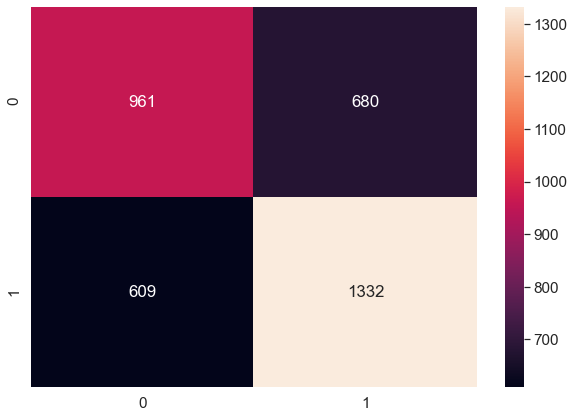

In [50]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Formatting Final Results

In [55]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [56]:
final_results

,entry_id,e_signed,predictions
0,7629673,1.0,0
6,7948313,1.0,1
28,7290744,0.0,0
43,4797409,1.0,0
52,2154744,1.0,0
...,...,...,...
17874,6603984,0.0,1
17875,4736767,1.0,0
17892,4669977,0.0,0
17894,9553800,1.0,0


In [57]:
df.to_csv('../result/final_results_dataset.csv', index=False)